<a href="https://colab.research.google.com/github/navneetsinghsingh/End-to-End-Book-recommender-system/blob/main/App_sensor_fault_detection(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [126]:
!pip install tensorflow

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
data=pd.read_csv('/content/aps_data.csv')

<ipython-input-128-b62c404d2d1d>:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/aps_data.csv')


In [129]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,neg,31394,na,0,na,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,neg,1598,na,0,na,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,neg,42,2,2130706454,56,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,neg,32752,na,0,na,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [130]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [131]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [132]:
data.isnull().sum()

,0
class,0
aa_000,0
ab_000,0
ac_000,0
ad_000,0
ae_000,0
af_000,0
ag_000,0
ag_001,0
ag_002,0


In [133]:
np.nan

nan

In [134]:
data.replace("na",np.nan,inplace=True)

In [135]:
pd.options.display.max_rows=1000

In [136]:
data.isnull().sum()

,0
class,0
aa_000,0
ab_000,3849
ac_000,308
ad_000,1236
ae_000,224
af_000,224
ag_000,58
ag_001,58
ag_002,58


In [137]:
data.isnull().sum().sum()

np.int64(71649)

In [138]:
pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).rename(columns={0:"null value count"})

,null value count
br_000,4105
bq_000,4043
bp_000,3960
cr_000,3849
ab_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [139]:
[feature for feature in data.columns if feature not in ['class']]


['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

In [140]:
for feature in [feature for feature in data.columns if feature != 'class']:
    # Try converting column to numeric (errors='coerce' will turn non-numeric values into NaN)
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    # Then fill missing values with median
    data[feature] = data[feature].fillna(data[feature].median())


In [141]:

data.isnull().sum()

,0
class,0
aa_000,0
ab_000,0
ac_000,0
ad_000,0
ae_000,0
af_000,0
ag_000,0
ag_001,0
ag_002,0


In [142]:
data.isnull().sum()

,0
class,0
aa_000,0
ab_000,0
ac_000,0
ad_000,0
ae_000,0
af_000,0
ag_000,0
ag_001,0
ag_002,0


In [143]:
data.isnull().sum().sum()

np.int64(0)

In [144]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,8.0,26.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0
1,neg,90,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,...,1268.0,526.0,554.0,300.0,118.0,260.0,0.0,0.0,0.0,0.0
2,neg,30,0.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,...,480.0,84.0,74.0,50.0,46.0,0.0,0.0,0.0,0.0,0.0
3,neg,444,0.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1614.0,1144.0,3598.0,2460.0,1258.0,8524.0,110.0,0.0,0.0,0.0
4,neg,82,0.0,12.0,10.0,0.0,0.0,0.0,0.0,1464.0,...,1010.0,132.0,310.0,56.0,92.0,1292.0,0.0,0.0,0.0,0.0


In [145]:
x=data.drop('class',axis=1)

In [146]:
y=data["class"]

In [147]:
x.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    aa_000  5000 non-null   int64  
 1    ab_000  5000 non-null   float64
 2    ac_000  5000 non-null   float64
 3    ad_000  5000 non-null   float64
 4    ae_000  5000 non-null   float64
 5    af_000  5000 non-null   float64
 6    ag_000  5000 non-null   float64
 7    ag_001  5000 non-null   float64
 8    ag_002  5000 non-null   float64
 9    ag_003  5000 non-null   float64
 10   ag_004  5000 non-null   float64
 11   ag_005  5000 non-null   float64
 12   ag_006  5000 non-null   float64
 13   ag_007  5000 non-null   float64
 14   ag_008  5000 non-null   float64
 15   ag_009  5000 non-null   float64
 16   ah_000  5000 non-null   float64
 17   ai_000  5000 non-null   float64
 18   aj_000  5000 non-null   float64
 19   ak_000  5000 non-null   float64
 20   al_000  5000 non-null   float64
 21   am_0    5000

In [148]:
pd.get_dummies(y,drop_first=True)

,pos
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [150]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 170)
(4000,)
(1000, 170)
(1000,)


In [151]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [152]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [153]:
classifier = Sequential()

classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=170))
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [154]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [155]:
classifier.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         1,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,831 (7.15 KB)

 Trainable params: 1,831 (7.15 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
x_train

array([[-0.39032946, -0.09154375, -0.42501521, ..., -0.22182035,
        -0.02192406, -0.03999294],
       [-0.20021489, -0.09154375, -0.4250143 , ..., -0.22182035,
        -0.02192406, -0.03999294],
       [-0.20408745, -0.09154375, -0.42501366, ..., -0.05193089,
        -0.02192406, -0.03999294],
       ...,
       [ 0.15651904, -0.09154375, -0.42501506, ...,  0.04890126,
        -0.02192406, -0.03999294],
       [-0.01055809, -0.09154375, -0.42501526, ..., -0.22182035,
        -0.02192406, -0.03999294],
       [-0.39109655, -0.09154375, -0.42501525, ..., -0.22182035,
        -0.02192406, -0.03999294]])

In [157]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train).astype('float32')
y_test = le.transform(y_test).astype('float32')


In [158]:
model_history = classifier.fit(x_train, y_train, batch_size=10, epochs=30, validation_split=0.25)


Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9304 - loss: 0.2963 - val_accuracy: 0.9830 - val_loss: 0.0583
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0559 - val_accuracy: 0.9870 - val_loss: 0.0453
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.9850 - val_loss: 0.0476
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0340 - val_accuracy: 0.9850 - val_loss: 0.0504
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9890 - val_loss: 0.0497
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9927 - loss: 0.0253 - val_accuracy: 0.9880 - val_loss: 0.0553
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9942 - loss: 0.0151 - val_accuracy: 0.9860 - val_loss: 0.0644
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0210 - val_accuracy: 0.

In [159]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [160]:
model_history.history['accuracy']

[0.9643333554267883,
 0.9829999804496765,
 0.9856666922569275,
 0.987333357334137,
 0.9906666874885559,
 0.9929999709129333,
 0.9933333396911621,
 0.9943333268165588,
 0.9929999709129333,
 0.996666669845581,
 0.9959999918937683,
 0.9946666955947876,
 0.996999979019165,
 0.996666669845581,
 0.996999979019165,
 0.9976666569709778,
 0.9973333477973938,
 0.9980000257492065,
 0.9980000257492065,
 0.9983333349227905,
 0.996666669845581,
 0.9963333606719971,
 0.9986666440963745,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.9993333220481873,
 0.999666690826416,
 1.0]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


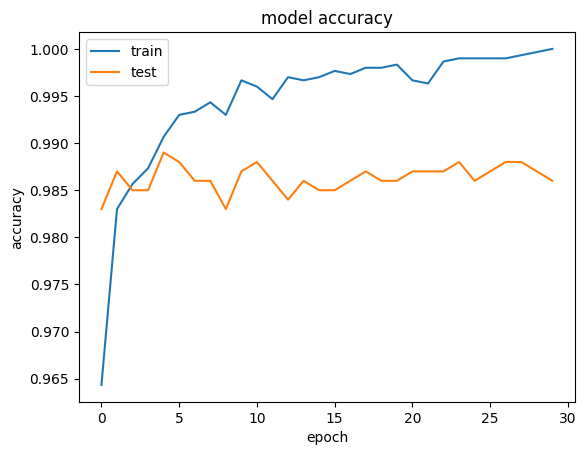

In [161]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

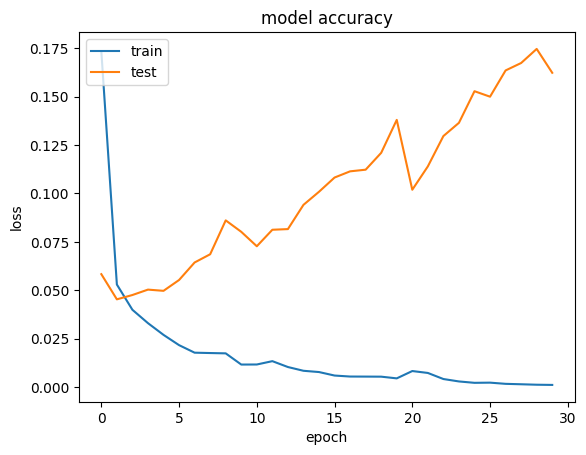

In [162]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [163]:
x_test.shape

(1000, 170)

In [164]:
y_pred=classifier.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# for the sigmoid my threshold is o

In [165]:
y_pred=y_pred>0.5

In [166]:
from sklearn.metrics import confusion_matrix

In [177]:
y_test.shape

(1000,)

In [178]:
y_pred.shape

(1000, 1)

In [179]:
confusion_matrix(y_test,y_pred)

array([[980,   6],
       [  4,  10]])

In [180]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [181]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2025_04_20_11_01_10_.h5


In [182]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade

In [183]:
from kerastuner.tuners import RandomSearch

In [184]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [185]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [188]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.9890000224113464

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 00m 17s


In [189]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [190]:
mymodel=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [191]:
mymodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         5,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,561 (25.63 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [193]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [195]:
tuner_second.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.9900000095367432

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 00h 01m 27s


In [196]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units_0': 32,
 'units_1': 224,
 'learning_rate': 0.01,
 'units_2': 32}

In [197]:
classifier2=tuner_second.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [198]:
classifier2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 32)               │         5,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 224)              │         7,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 32)               │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,097 (78.50 KB)

 Trainable params: 20,097 (78.50 KB)

 Non-trainable params: 0 (0.00 B)